In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from cam_generator import CAMGenerator
import pandas as pd
from constant import CSV_DIR, CLASS_NAMES
import numpy as np

In [2]:
def plot_xray_image(xray_image): # , blended_images, predict_label, true_label
    plt.imshow(xray_image, cmap = 'gray', interpolation = 'bicubic')
    plt.title('Orig X Ray')
    plt.axis('off')
    plt.show()
    
def plot_blended(blended_image, predict_label, prob):
    blended_plot = plt.imshow(blended_image, interpolation = 'bicubic')
    plt.title('%s %.2f%%' % (predict_label, prob * 100))
    plt.axis('off')
    plt.show()

In [3]:
cam_generator = CAMGenerator(architecture='models.densenet',
                             variant='densenet121',
                             model_name='20180429-130928')
strong_chexnet_test = '%s/chexnet_strong_test.csv' % CSV_DIR
df = pd.read_csv(strong_chexnet_test, header=None, delimiter=' ')

In [30]:
onehot = [False, True, False, False, False, False, False, False, False, False, False, False, False, False]
ids = np.where(onehot)[0]
', '.join(np.take(CLASS_NAMES, ids))

'Cardiomegaly'

Sum 0.7148192


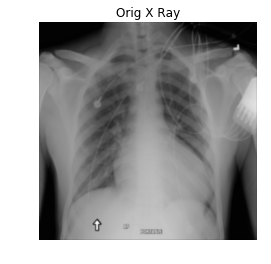

Groundtruth: Cardiomegaly


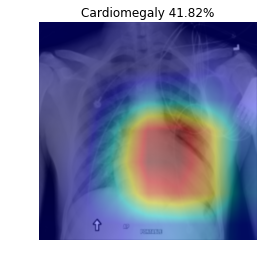

Sum 0.84357846


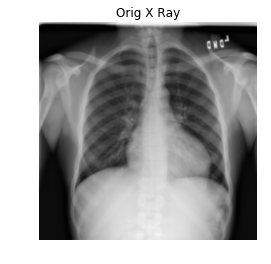

Groundtruth: Cardiomegaly


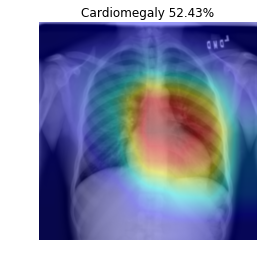

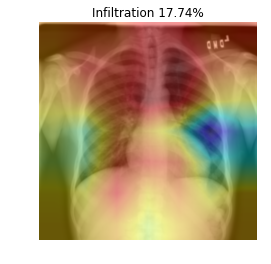

Sum 0.94459575


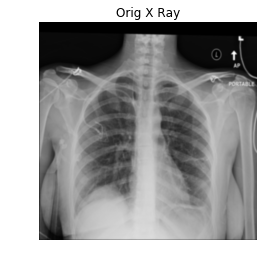

Groundtruth: Mass


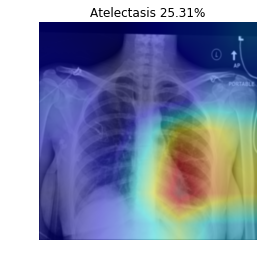

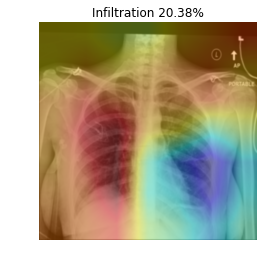

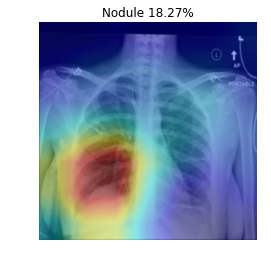

Sum 1.414174


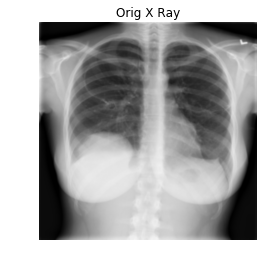

Groundtruth: Atelectasis, Mass


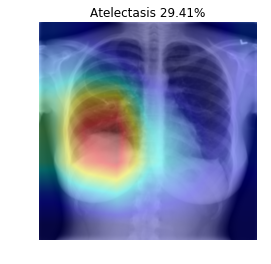

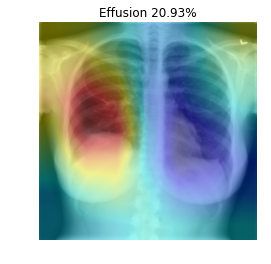

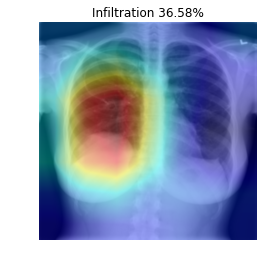

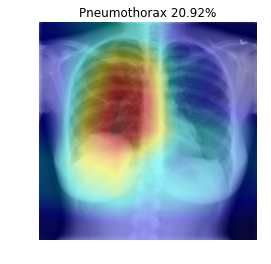

Sum 1.7441882


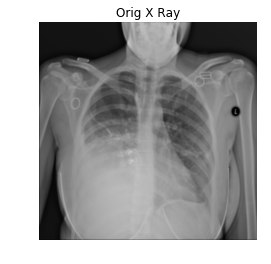

Groundtruth: Effusion, Mass, Consolidation


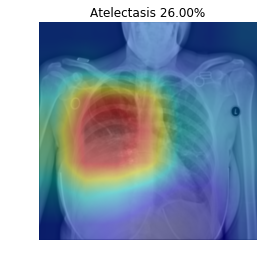

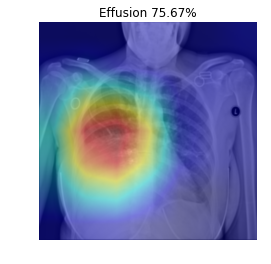

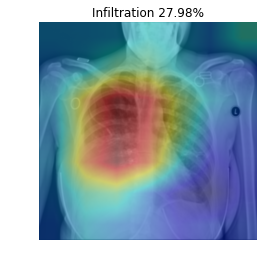

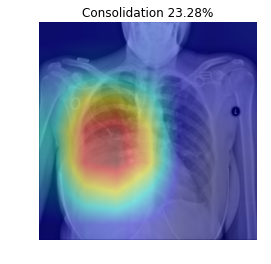

Sum 1.0731522


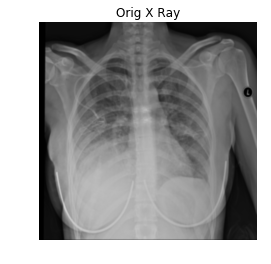

Groundtruth: Effusion, Infiltration


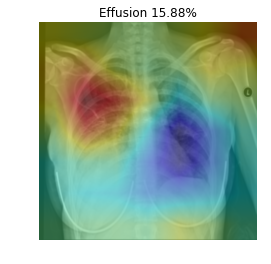

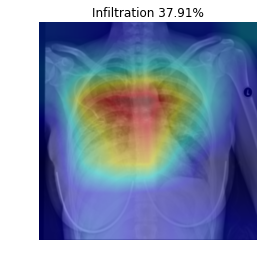

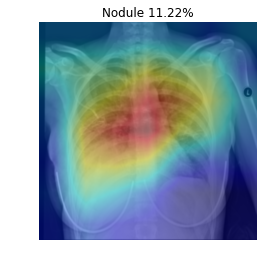

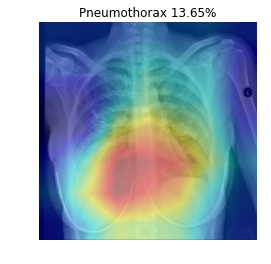

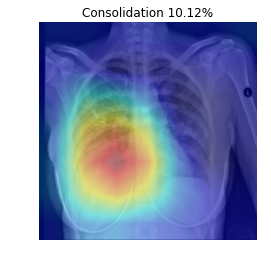

Sum 0.59477913


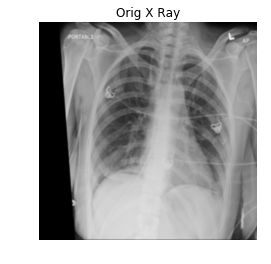

Groundtruth: Pneumothorax


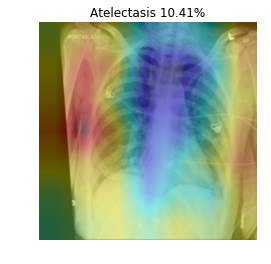

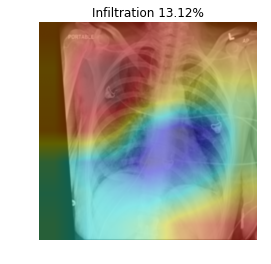

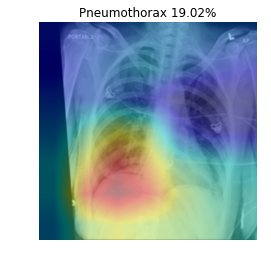

Sum 1.4773427


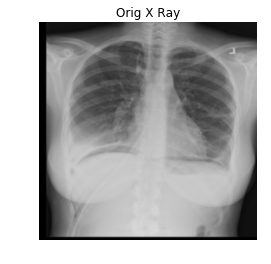

Groundtruth: Pneumothorax


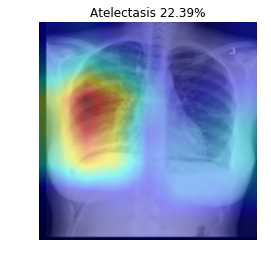

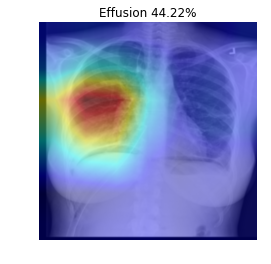

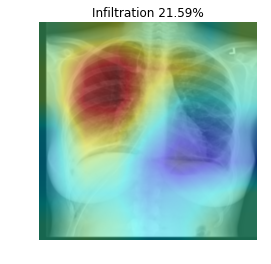

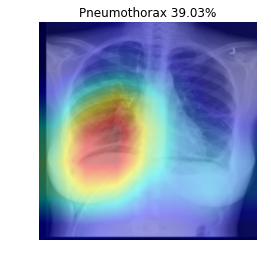

Sum 1.255619


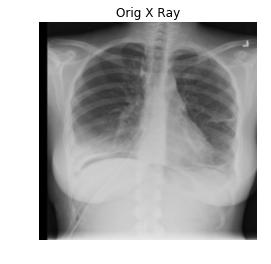

Groundtruth: Pneumothorax


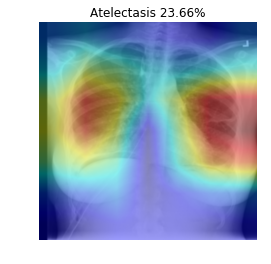

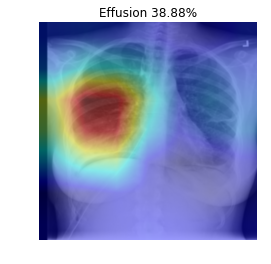

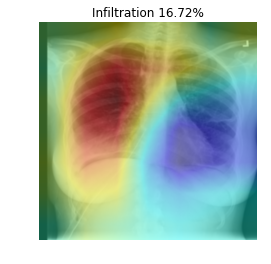

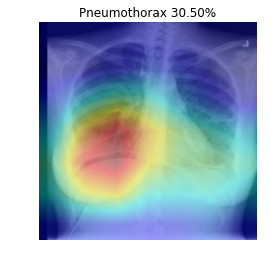

Sum 1.38084


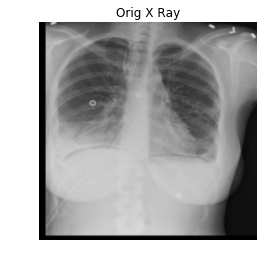

Groundtruth: Effusion, Pneumothorax


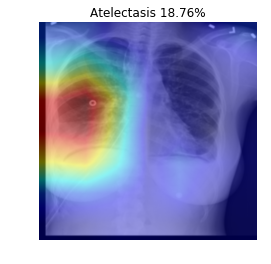

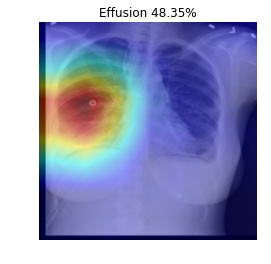

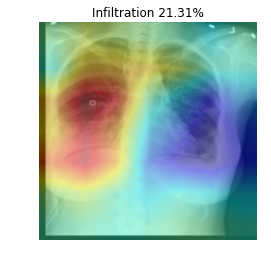

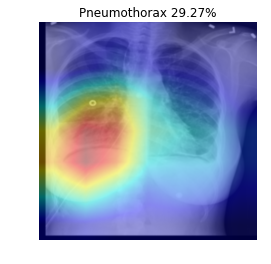

Sum 1.3149214


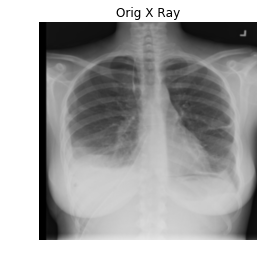

Groundtruth: Pneumothorax


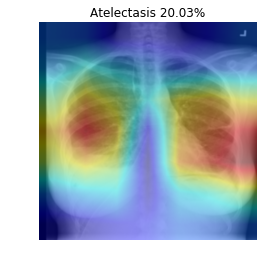

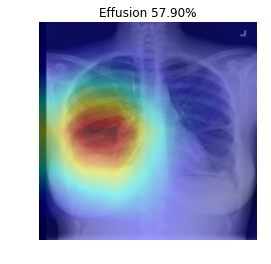

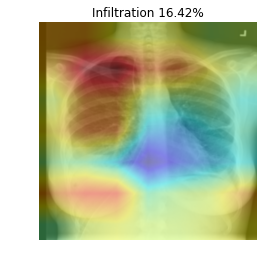

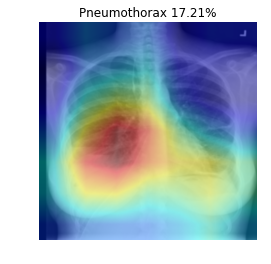

Sum 1.3134559


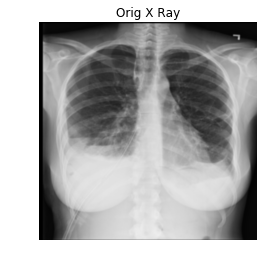

Groundtruth: Normal


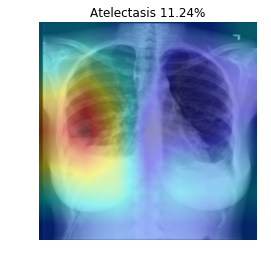

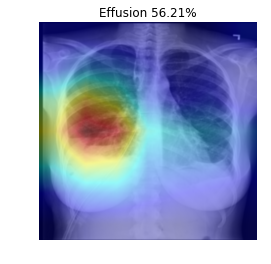

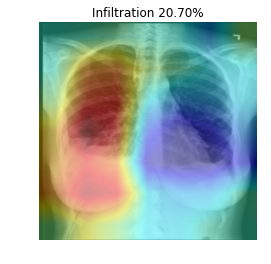

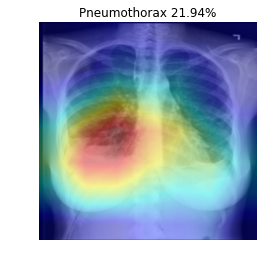

Sum 1.2312056


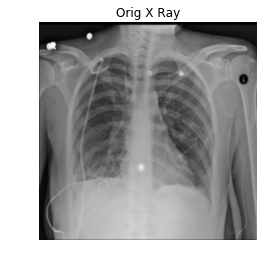

Groundtruth: Effusion, Pneumothorax


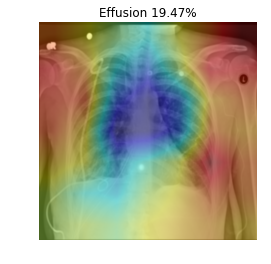

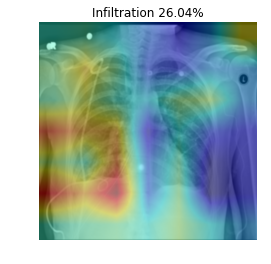

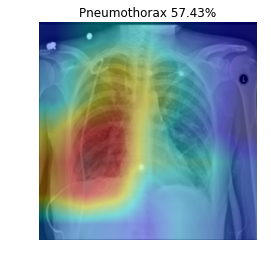

Sum 1.5401136


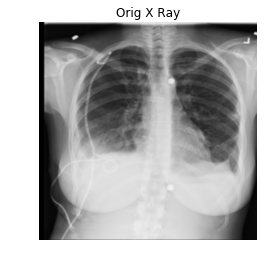

Groundtruth: Effusion, Pneumothorax


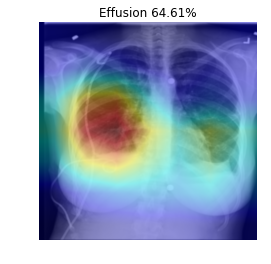

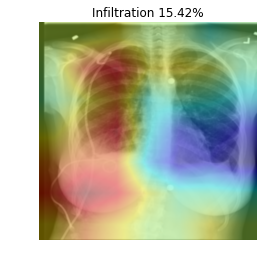

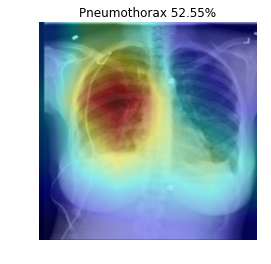

Sum 1.7455676


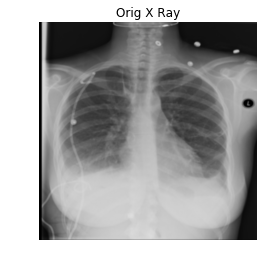

Groundtruth: Effusion


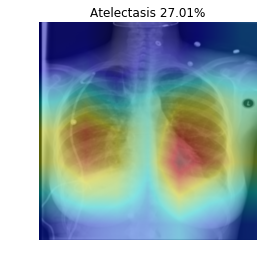

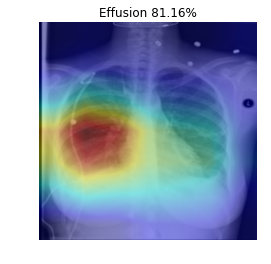

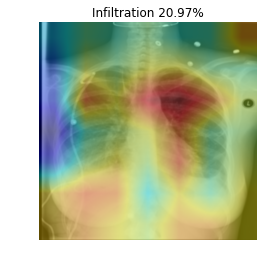

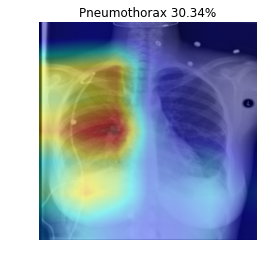

Sum 1.4355092


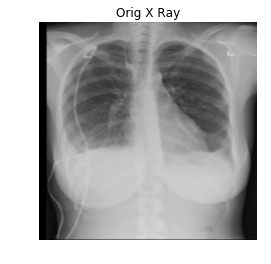

Groundtruth: Effusion


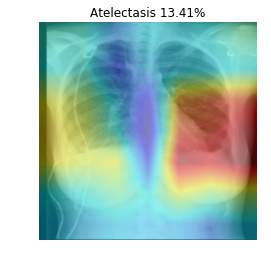

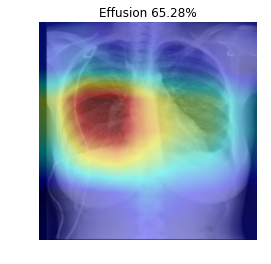

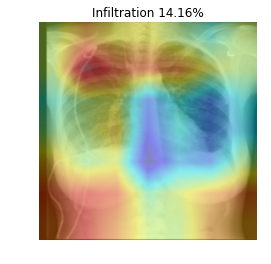

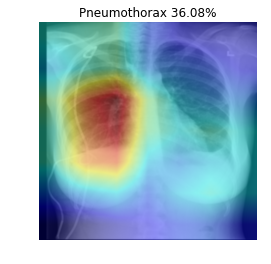

Sum 1.6413659


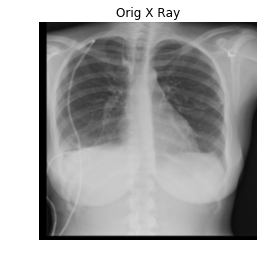

Groundtruth: Normal


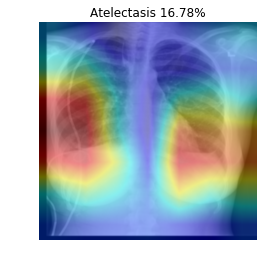

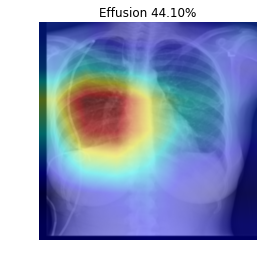

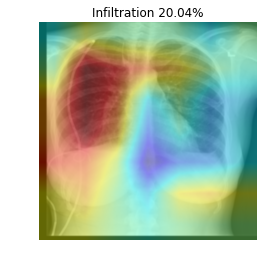

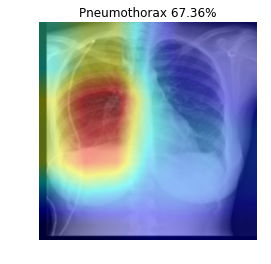

Sum 1.594992


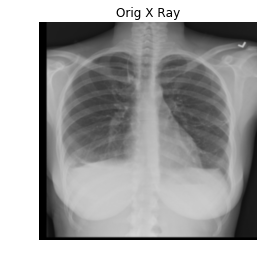

Groundtruth: Atelectasis, Effusion


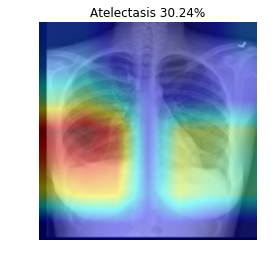

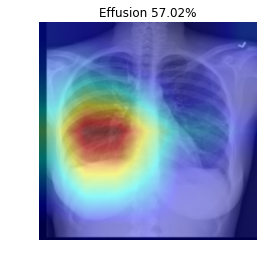

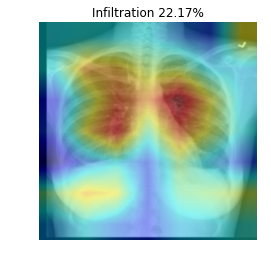

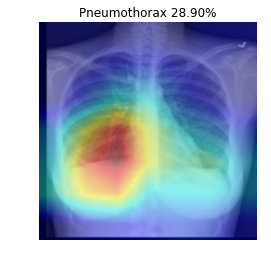

Sum 1.040309


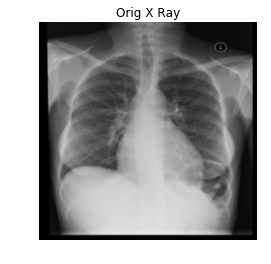

Groundtruth: Cardiomegaly


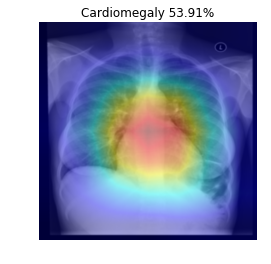

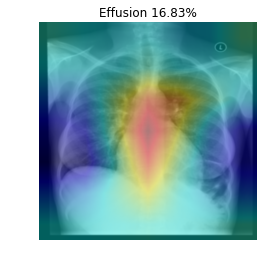

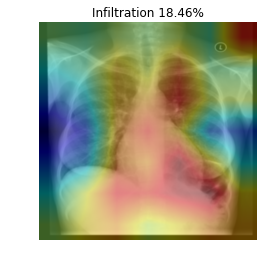

Sum 1.2871494


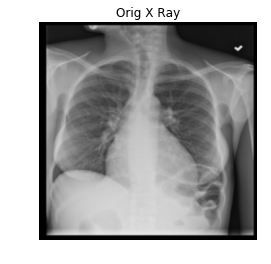

Groundtruth: Cardiomegaly


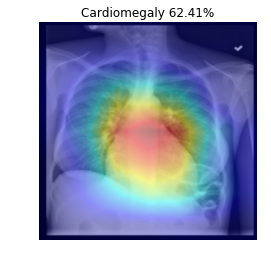

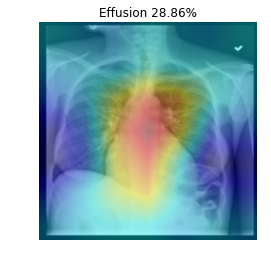

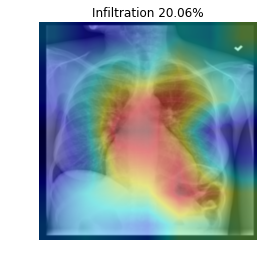

In [31]:
for i, r in enumerate(df.iterrows()):
    if i < 20:
        continue
    if i >= 40:
        break
        
    r = r[1]
    image_file = r[1]
    onehot = r[2:].values
    if np.sum(onehot) == 0:
        gt = 'Normal'
    else:
        ids = np.where(onehot)[0]
        gt = ', '.join(np.take(CLASS_NAMES, ids))
    image, results = cam_generator.cam(image_file)
    plot_xray_image(image)
    print('Groundtruth:', gt)
    if results == 'NORMAL':
        print('Normal')
    else:
        for (blended, disease, prob) in results:
            plot_blended(blended, disease, prob)
    print('=' * 40)
    